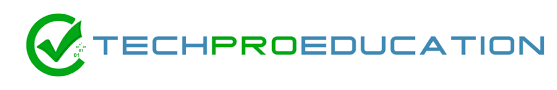

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [6]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [8]:
df.duplicated().value_counts()

False    17414
dtype: int64

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


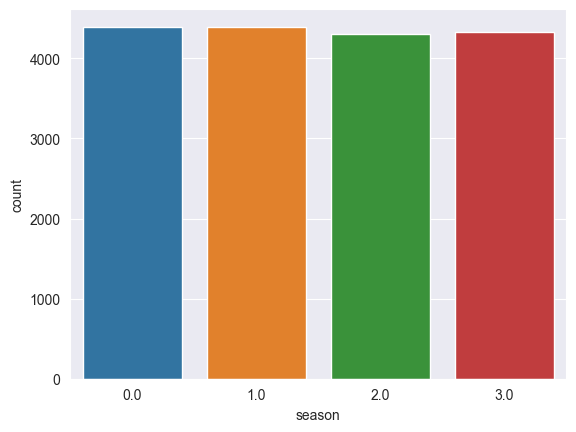

In [9]:
sns.countplot("season", data=df);

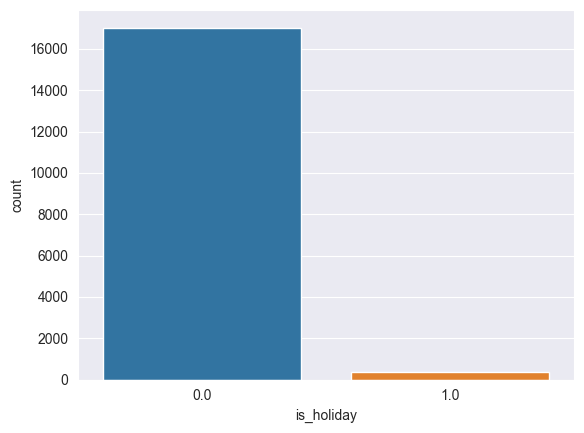

In [23]:
sns.countplot("is_holiday", data=df);

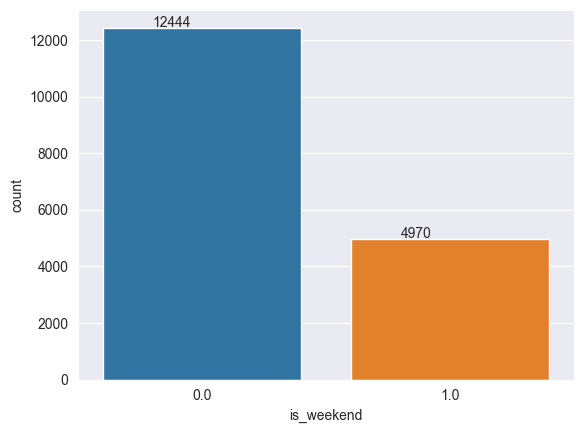

In [24]:
ax = sns.countplot("is_weekend", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

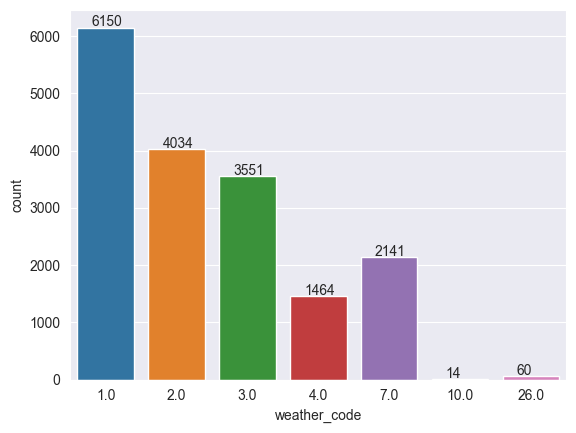

In [25]:
ax = sns.countplot("weather_code", data=df);

for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x()+0.2, p.get_height()+20) );

In [26]:
df.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

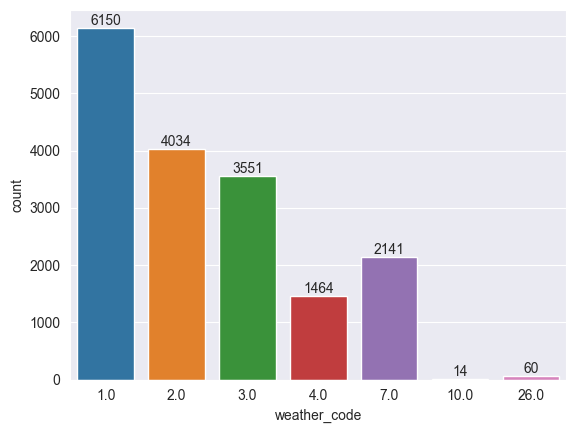

In [27]:
sns.countplot(data = df, x = "weather_code");

code = df.weather_code.value_counts().sort_index()
for index, value in enumerate(code):
    plt.text(index, value, str(value), ha="center", va="bottom")

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [22]:
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index("timestamp",inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

In [28]:
df["month"] =  df.index.month
df["day_of_month"] =  df.index.day
df["day_of_week"] =  df.index.dayofweek
df["hour"] = df.index.hour

df["year-month"] = df.index.strftime("%Y-%m")
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day_of_month,day_of_week,hour,year-month
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,6,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,6,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,6,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,6,4,2015-01


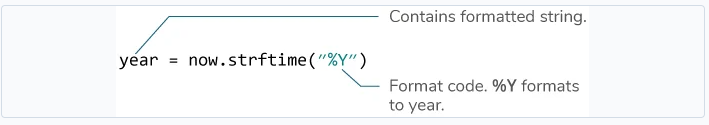

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

<AxesSubplot: >

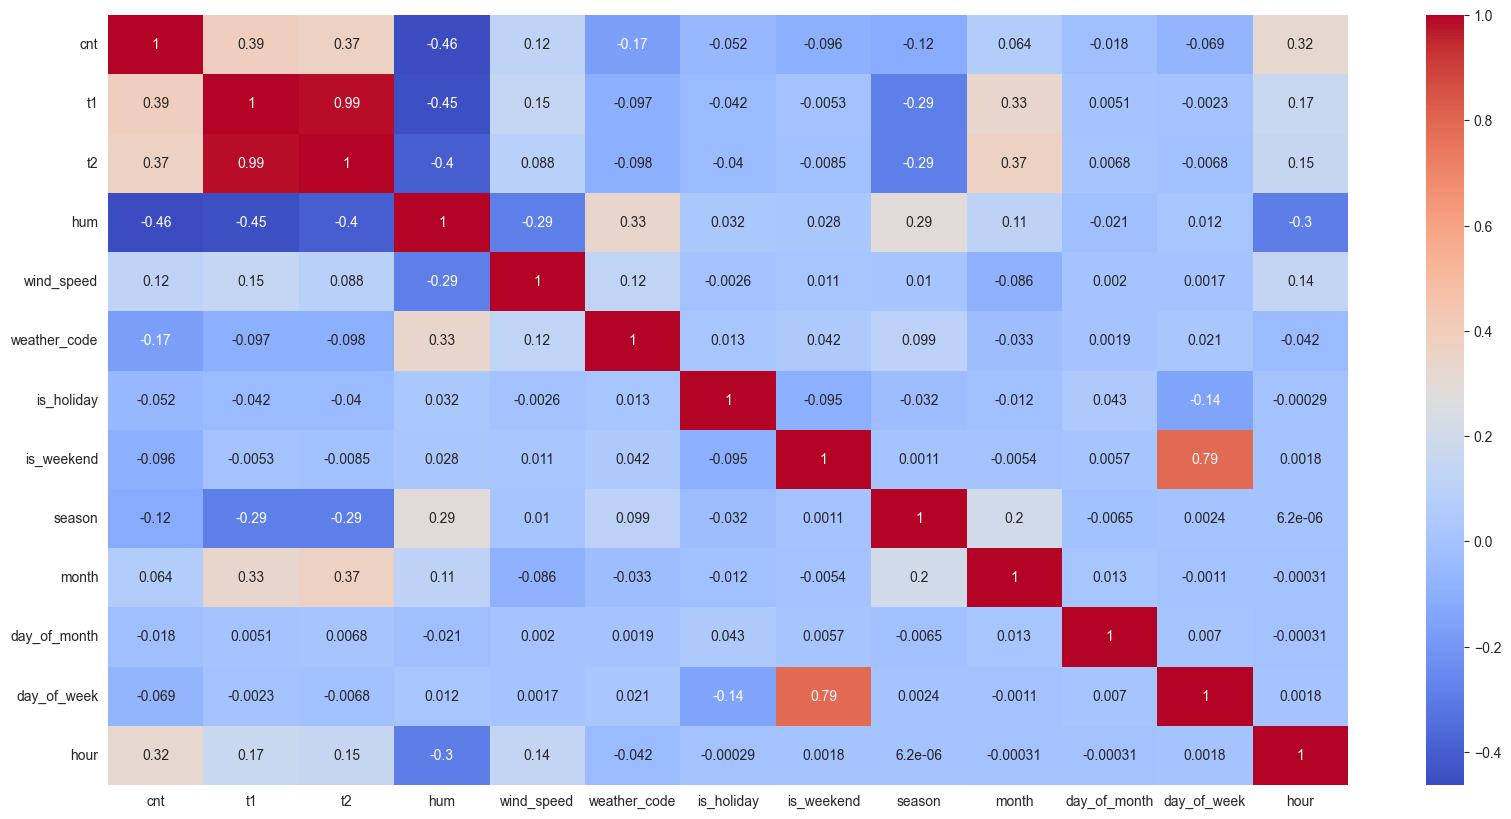

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

In [31]:
df.corr()[["cnt"]].T

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day_of_month,day_of_week,hour
cnt,1.0,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.11618,0.063757,-0.017887,-0.068688,0.324423


<AxesSubplot: >

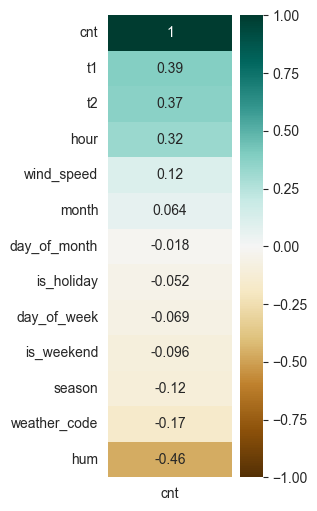

In [32]:
plt.figure(figsize=(2,6))
sns.heatmap(df.corr()[["cnt"]].sort_values(by="cnt", ascending=False), annot=True, cmap='BrBG', vmin=-1)

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

In [33]:
df.corr()[["cnt"]].sort_values(by="cnt", ascending=False)

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688
is_weekend,-0.096499


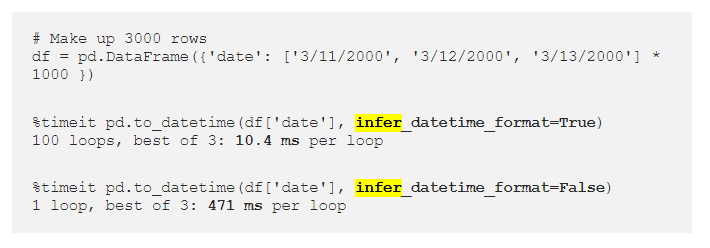

<AxesSubplot: >

<Figure size 1000x600 with 0 Axes>

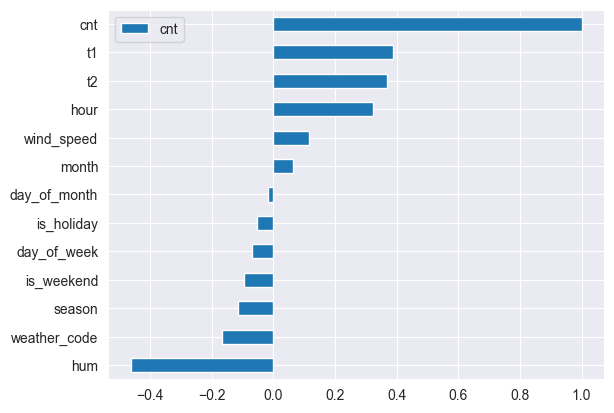

In [34]:
plt.figure(figsize=(10,6))

df.corr()[["cnt"]].sort_values(by="cnt").plot.barh()

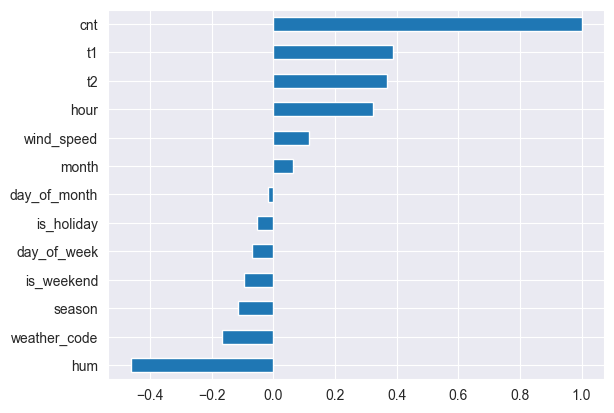

In [35]:
df.corr()["cnt"].sort_values().plot.barh();

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

<AxesSubplot: xlabel='timestamp', ylabel='cnt'>

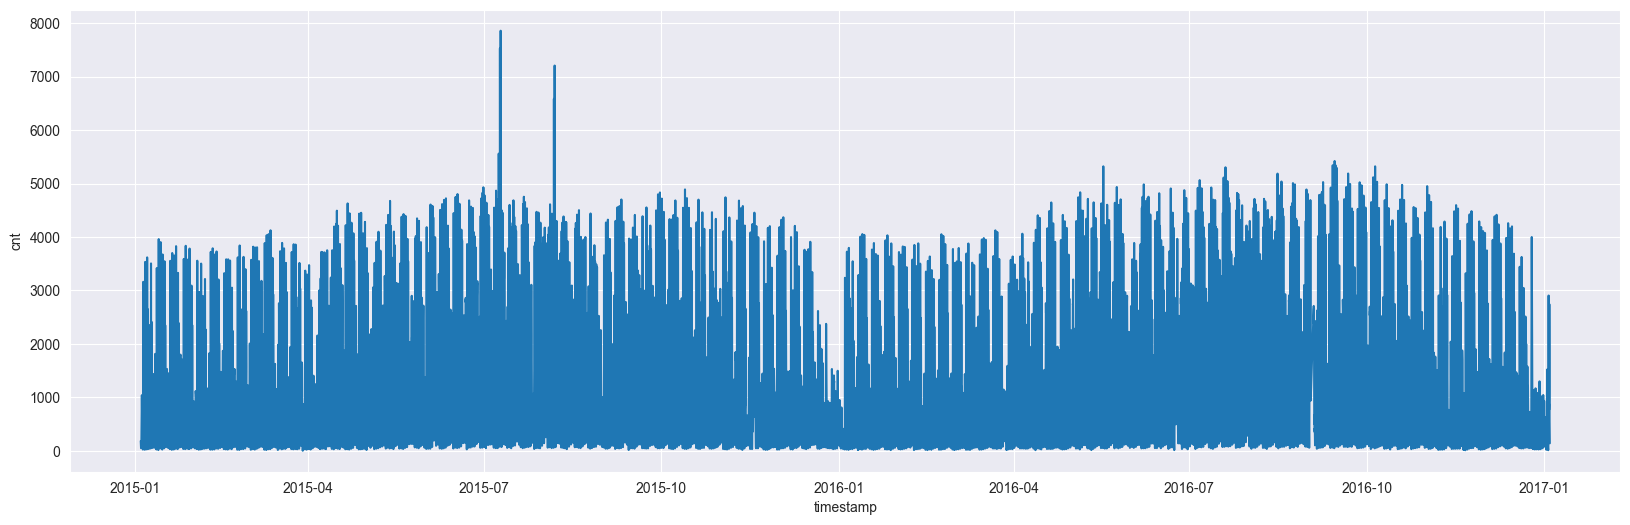

In [36]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df.index, y="cnt", data=df)

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   month         17414 non-null  int64  
 10  day_of_month  17414 non-null  int64  
 11  day_of_week   17414 non-null  int64  
 12  hour          17414 non-null  int64  
 13  year-month    17414 non-null  object 
dtypes: float64(8), int64(5), object(1)
memory usage: 2.5+ MB


In [38]:
df_sum = pd.DataFrame(df.groupby("year-month").cnt.sum())
df_sum

,cnt
year-month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


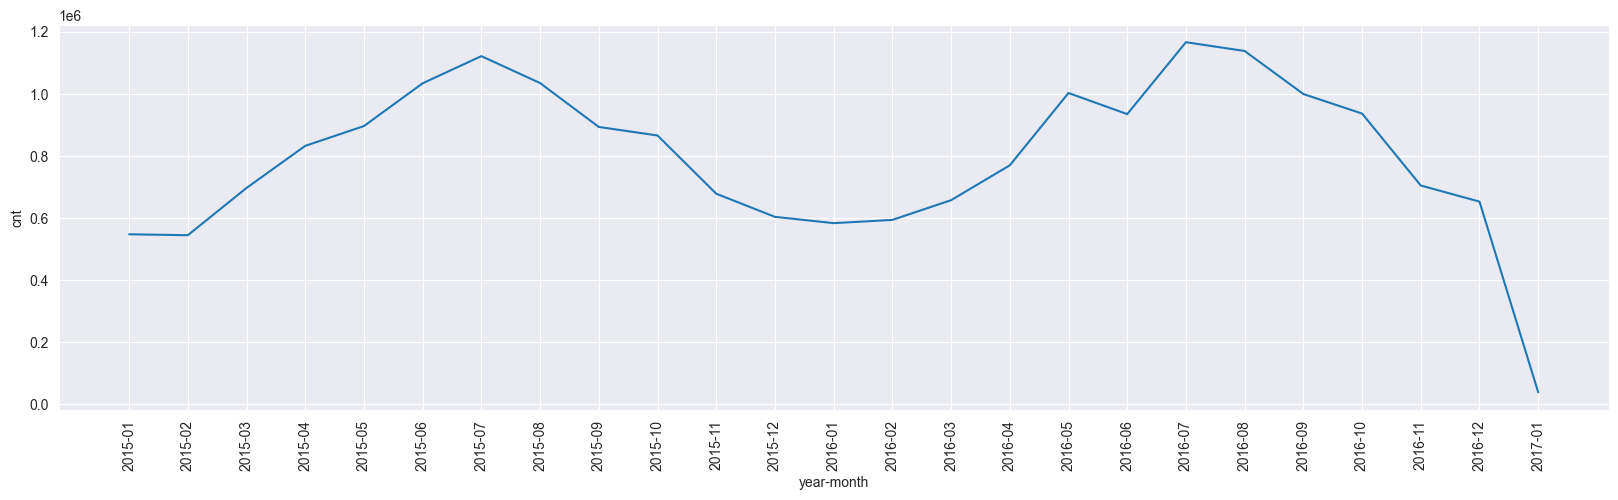

In [39]:
plt.figure(figsize=(20,5))
sns.lineplot(x="year-month",y="cnt", data = df_sum)
plt.xticks(rotation=90);

<AxesSubplot: xlabel='month', ylabel='cnt'>

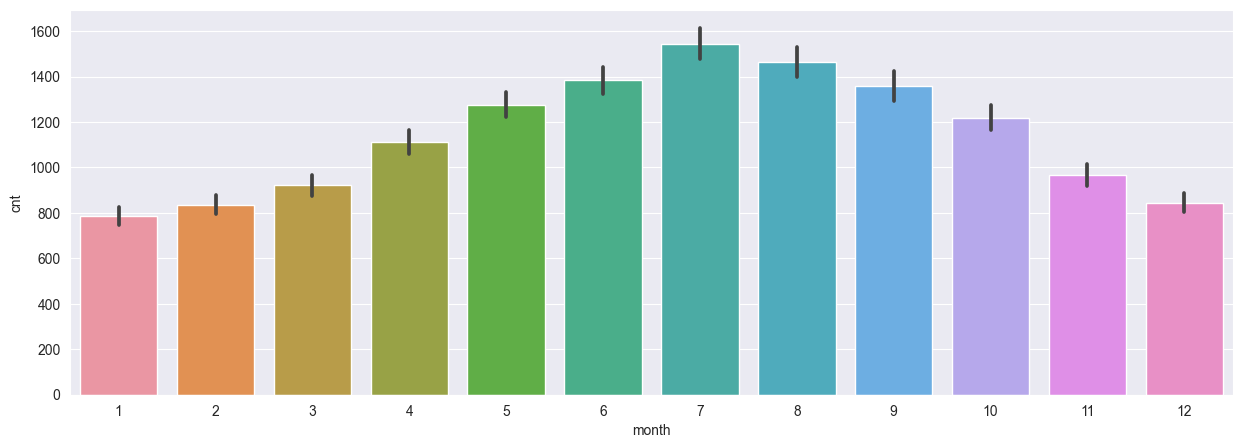

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x= "month", y="cnt", data=df, ci=95)

<AxesSubplot: xlabel='month', ylabel='cnt'>

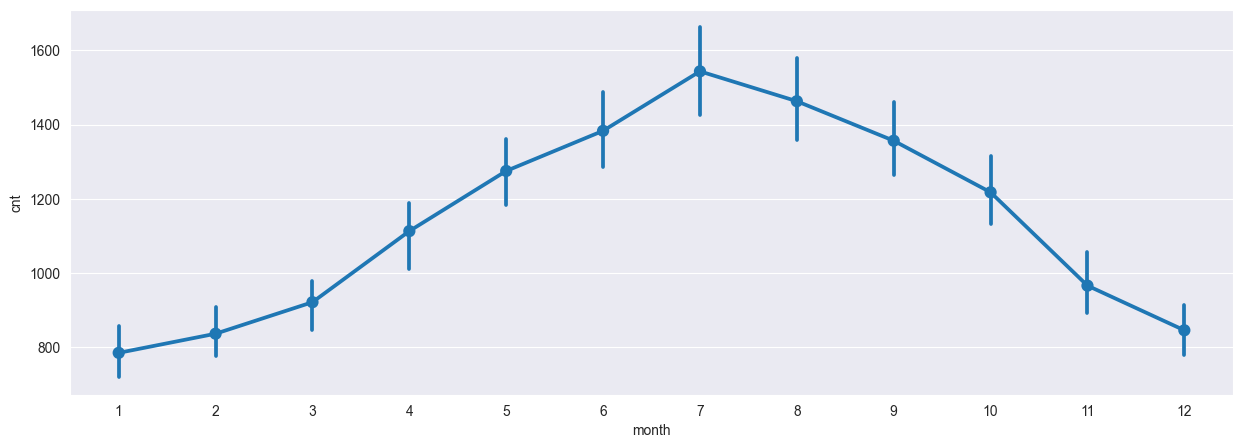

In [42]:
plt.figure(figsize=(15,5))
sns.pointplot(x= "month", y="cnt", data=df, ci=100)

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

<AxesSubplot: xlabel='hour', ylabel='cnt'>

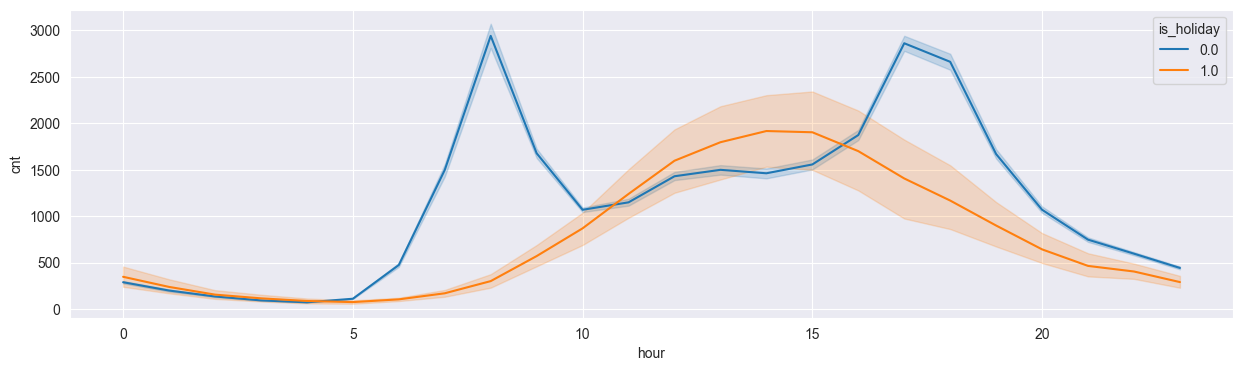

In [44]:
plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="is_holiday")

<AxesSubplot: xlabel='hour', ylabel='cnt'>

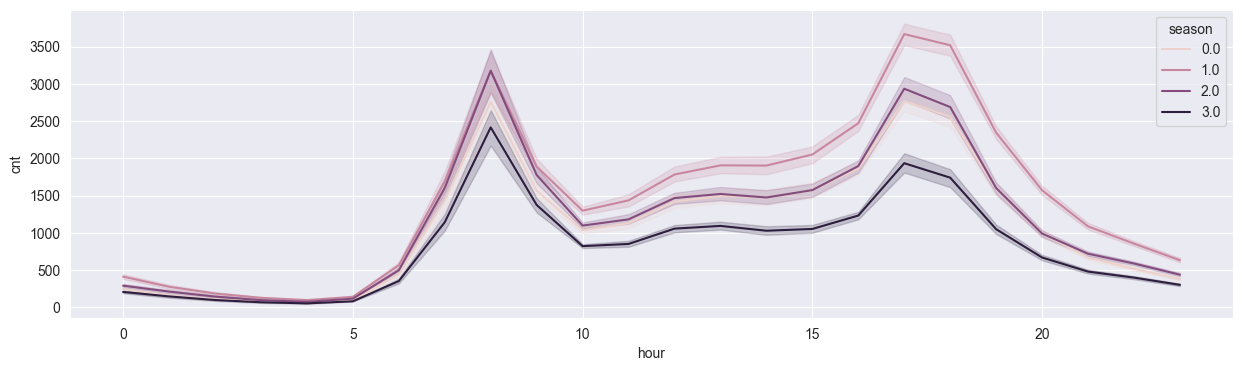

In [46]:
plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="season")

<AxesSubplot: xlabel='hour', ylabel='cnt'>

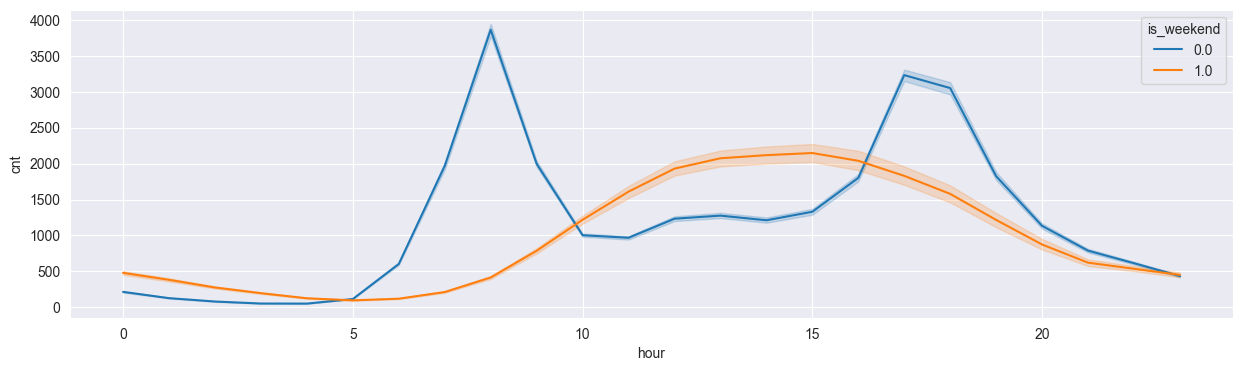

In [48]:
plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="is_weekend")

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

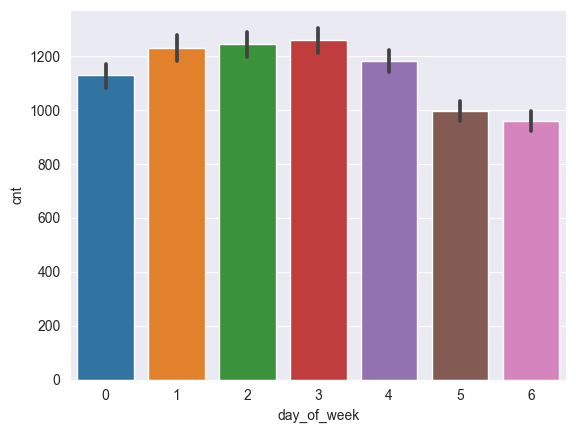

In [49]:
sns.barplot(x="day_of_week", y="cnt", data=df);

<AxesSubplot: xlabel='day_of_week', ylabel='cnt'>

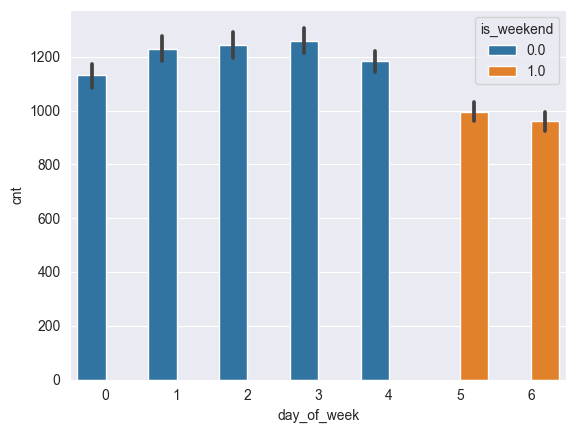

In [50]:
sns.barplot(x="day_of_week", y="cnt", data=df, hue="is_weekend")

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


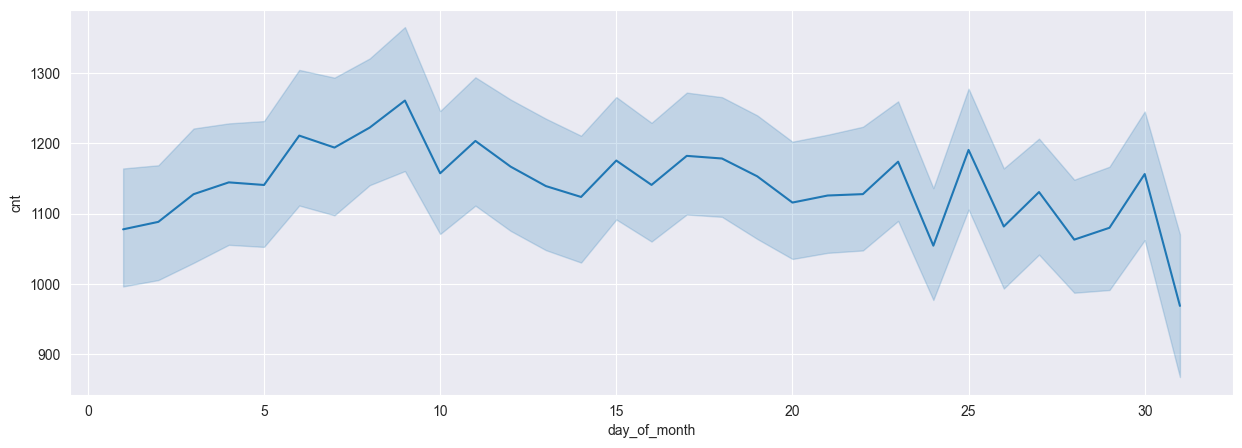

In [51]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x="day_of_month", y="cnt")

pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

<AxesSubplot: xlabel='season', ylabel='cnt'>

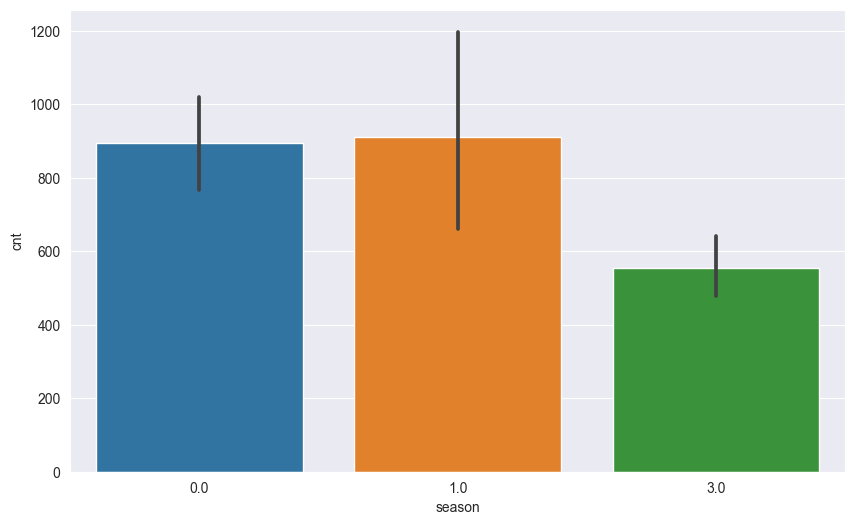

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(data=df[df["is_holiday"]==1], x="season",y="cnt")

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [54]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

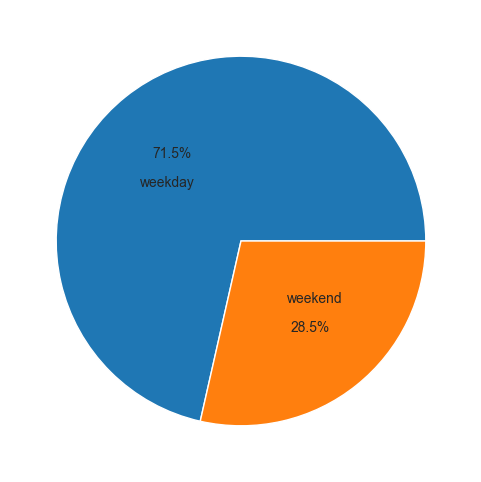

In [55]:
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(df.is_weekend.value_counts(),
      labels=["weekday","weekend"],
       labeldistance=0.4,
        autopct="%.1f%%"
      );

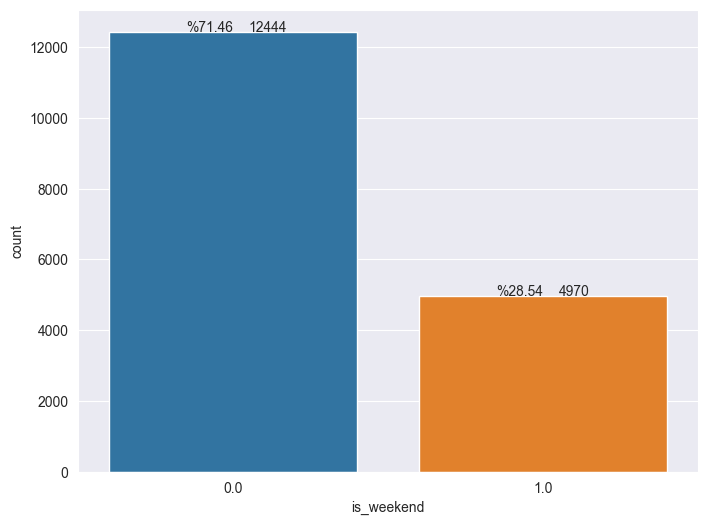

In [58]:

ig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df,x="is_weekend",ax=ax)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.45, p.get_height()+1))
    ax.annotate("%"+str(round((p.get_height()/(df.is_weekend.count()))*100,2)), (p.get_x()+0.25, p.get_height()+10));

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

<AxesSubplot: xlabel='weather_code', ylabel='count'>

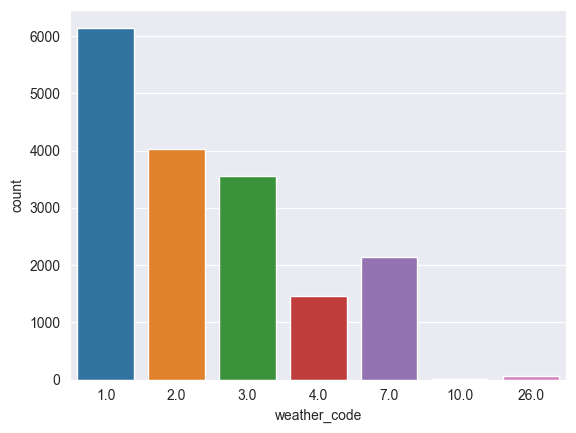

In [59]:
sns.countplot(x="weather_code", data=df)

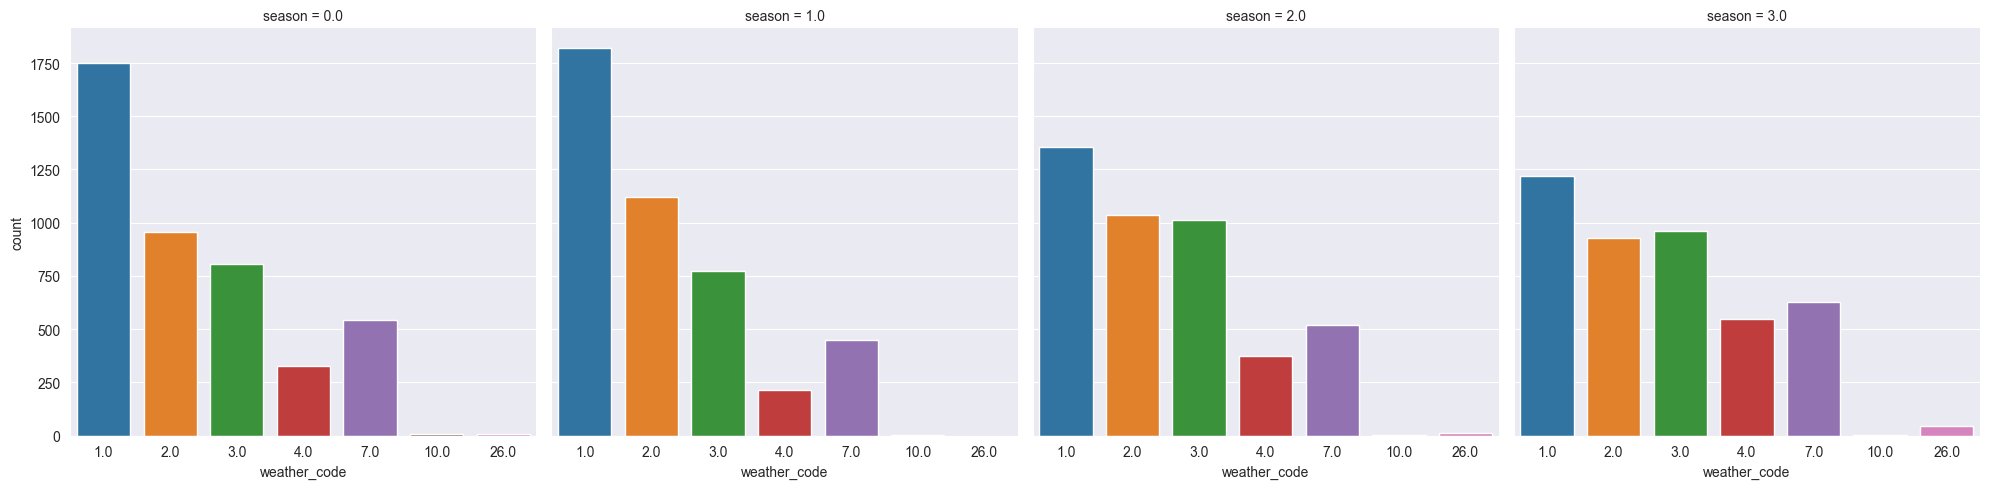

In [61]:
sns.catplot(x="weather_code", data=df, col="season", kind="count")

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

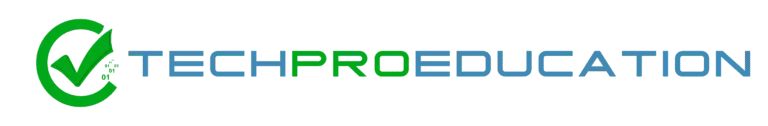